In [1]:

import datetime
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functools import partial

from utils import Scale
from utils import smooth_signal
from utils import is_dawn_partial, is_day_partial, is_night_partial
from utils import location_station, find_set_sunrise, find_set_sunset
from utils import generate_vm_vd

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')
df_station = pd.read_pickle('./data/df_station_sort_re.pkl')

In [3]:
lat = df_station.loc[df_station['identificationstation'] == 'sj2']['latitude'].values[0]
long = df_station.loc[df_station['identificationstation'] == 'sj2']['longitude'].values[0]

In [4]:
is_day = partial(is_day_partial, lat=lat, long=long)
is_night = partial(is_night_partial, lat=lat, long=long)
is_dawn = partial(is_dawn_partial, lat=lat, long=long)

In [5]:
state_day = []
for i in df.index.values:
    state_day.append(is_day(i))

state_day = np.array(state_day)
df['state_day'] = state_day

state_night = []
for i in df.index.values:
    state_night.append(is_night(i))

state_night = np.array(state_night)
df['state_night'] = state_night

state_dawn = []
for i in df.index.values:
    state_dawn.append(is_dawn(i))

state_dawn = np.array(state_dawn)
df['state_dawn'] = state_dawn

In [6]:
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,gvtec3,gvtec3_dt,s4,state_day,state_night,state_dawn
2013-12-01 02:10:00,38.901869,-1.406371,0.090805,-3.012794,-0.302865,-0.138129,-2.709478,-0.748023,-0.046265,0.116034,0.0,0.0,0.0
2013-12-01 02:20:00,37.676039,-1.201542,0.204829,-3.176458,-0.149123,-1.840996,-1.712064,-0.797389,-0.046810,0.112015,0.0,0.0,0.0
2013-12-01 02:30:00,36.751092,-0.957067,0.244475,-3.090844,0.030793,-2.211419,-0.669840,-0.815543,-0.040540,0.111552,0.0,0.0,0.0
2013-12-01 02:40:00,36.059834,-0.762969,0.194098,-2.880283,0.127728,-1.957485,-0.038873,-0.858718,-0.060494,0.108269,0.0,0.0,0.0
2013-12-01 02:50:00,35.416633,-0.653073,0.109896,-2.733366,0.097938,-1.737745,0.141762,-0.969081,-0.102394,0.106616,0.0,0.0,0.0
2013-12-01 03:00:00,34.811207,-0.574361,0.078712,-2.755053,-0.015375,-1.709829,0.177257,-1.126002,-0.134052,0.107674,0.0,0.0,1.0
2013-12-01 03:10:00,34.339603,-0.482407,0.091954,-2.925624,-0.126004,-1.532147,0.433204,-1.279977,-0.126368,0.109406,0.0,0.0,1.0
2013-12-01 03:20:00,33.970989,-0.406396,0.076011,-3.149807,-0.160409,-0.631517,1.082645,-1.376824,-0.064003,0.110232,0.0,0.0,1.0
2013-12-01 03:30:00,33.624428,-0.398034,0.008362,-3.292183,-0.083374,1.416386,1.993184,-1.347321,0.057349,0.110391,0.0,0.0,1.0
2013-12-01 03:40:00,33.205025,-0.498815,-0.100781,-3.223600,0.092175,4.499241,2.803346,-1.128980,0.223158,0.111233,0.0,0.0,1.0


In [7]:
df['state_day_shift'] = df['state_day'].shift(1)
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,gvtec3,gvtec3_dt,s4,state_day,state_night,state_dawn,state_day_shift
2013-12-01 02:10:00,38.901869,-1.406371,0.090805,-3.012794,-0.302865,-0.138129,-2.709478,-0.748023,-0.046265,0.116034,0.0,0.0,0.0,NaN
2013-12-01 02:20:00,37.676039,-1.201542,0.204829,-3.176458,-0.149123,-1.840996,-1.712064,-0.797389,-0.046810,0.112015,0.0,0.0,0.0,0.0
2013-12-01 02:30:00,36.751092,-0.957067,0.244475,-3.090844,0.030793,-2.211419,-0.669840,-0.815543,-0.040540,0.111552,0.0,0.0,0.0,0.0
2013-12-01 02:40:00,36.059834,-0.762969,0.194098,-2.880283,0.127728,-1.957485,-0.038873,-0.858718,-0.060494,0.108269,0.0,0.0,0.0,0.0
2013-12-01 02:50:00,35.416633,-0.653073,0.109896,-2.733366,0.097938,-1.737745,0.141762,-0.969081,-0.102394,0.106616,0.0,0.0,0.0,0.0
2013-12-01 03:00:00,34.811207,-0.574361,0.078712,-2.755053,-0.015375,-1.709829,0.177257,-1.126002,-0.134052,0.107674,0.0,0.0,1.0,0.0
2013-12-01 03:10:00,34.339603,-0.482407,0.091954,-2.925624,-0.126004,-1.532147,0.433204,-1.279977,-0.126368,0.109406,0.0,0.0,1.0,0.0
2013-12-01 03:20:00,33.970989,-0.406396,0.076011,-3.149807,-0.160409,-0.631517,1.082645,-1.376824,-0.064003,0.110232,0.0,0.0,1.0,0.0
2013-12-01 03:30:00,33.624428,-0.398034,0.008362,-3.292183,-0.083374,1.416386,1.993184,-1.347321,0.057349,0.110391,0.0,0.0,1.0,0.0
2013-12-01 03:40:00,33.205025,-0.498815,-0.100781,-3.223600,0.092175,4.499241,2.803346,-1.128980,0.223158,0.111233,0.0,0.0,1.0,0.0


In [8]:
delta_t = np.timedelta64(1, 'h')

df['vm1'], df['vd1'] = generate_vm_vd(df, delta_t)

In [9]:
delta_t = np.timedelta64(2, 'h')

df['vm2'], df['vd2'] = generate_vm_vd(df, delta_t)

In [10]:
df[['vm1', 'vd1', 'vm2', 'vd2']][120:150].head()

,vm1,vd1,vm2,vd2
2013-12-01 22:10:00,38.983657,1.803481,41.632905,3.426694
2013-12-01 22:20:00,38.983657,1.803481,41.632905,3.426694
2013-12-01 22:30:00,38.983657,1.803481,41.632905,3.426694
2013-12-01 22:40:00,38.983657,1.803481,41.632905,3.426694
2013-12-01 22:50:00,38.983657,1.803481,41.632905,3.426694


In [11]:
#df['gvtec1_dt_lag_9'] = smooth_signal(df['gvtec1'] -  df['gvtec1'].shift(9))
#df['gvtec2_dt_lag_20'] = smooth_signal(df['gvtec2'] -  df['gvtec2'].shift(20))

df['gvtec1_dt_lag_9'] = df['gvtec1'] -  df['gvtec1'].shift(9)
df['gvtec2_dt_lag_20'] = df['gvtec2'] -  df['gvtec2'].shift(20)

In [12]:
#df['vtec_dt_lag_3'] = smooth_signal(df['vtec'] -  df['vtec'].shift(3))
df['vtec_dt_lag_3'] = df['vtec'] -  df['vtec'].shift(3)

In [13]:
df.to_pickle('./data/sj2_analise_update1.pkl')
df.to_csv('./data/sj2_analise_update1.csv')

df = df.dropna()

# select some features to continue
df = df[['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
         'gvtec2_dt', 'state_day', 'state_night', 'state_dawn',
         'vm1', 'vd1', 'vm2', 'vd2', 'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4']]

# drop day, continue with just night
df = df[df['state_day'] == 0.0]
if 'state_day' in df.columns.values:
    df = df.drop('state_day', axis=1)

df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,state_night,state_dawn,vm1,vd1,vm2,vd2,gvtec1_dt_lag_9,gvtec2_dt_lag_20,vtec_dt_lag_3,s4
2013-12-01 21:40:00,36.877390,-0.204447,0.357627,-3.145823,0.117164,-3.462130,-0.352894,1.0,0.0,38.983657,1.803481,41.632905,3.426694,-0.502548,-5.888815,-1.766987,0.122669
2013-12-01 21:50:00,37.131272,0.236938,0.441385,-2.821111,0.258330,-2.118387,1.146562,1.0,0.0,38.983657,1.803481,41.632905,3.426694,-0.114217,-4.578767,-0.647162,0.124419
2013-12-01 22:00:00,37.877660,0.637702,0.400765,-2.449342,0.278685,0.562568,2.320268,1.0,0.0,38.983657,1.803481,41.632905,3.426694,0.109527,-2.763660,0.733999,0.127147
2013-12-01 22:10:00,38.863345,0.876499,0.238796,-2.231519,0.139587,3.802143,2.878956,1.0,0.0,38.983657,1.803481,41.632905,3.426694,0.152044,-1.055926,1.985955,0.129347
2013-12-01 22:20:00,39.850060,0.935256,0.058757,-2.338083,-0.131245,6.832141,2.807942,1.0,0.0,38.983657,1.803481,41.632905,3.426694,0.038754,-0.017513,2.718789,0.129478


In [14]:
df.to_pickle('./data/sj2_analise_update.pkl')
df.to_csv('./data/sj2_analise_update.csv')

In [15]:
# to s4 data
value_min_s4 = df['s4'].min()
value_max_s4 = df['s4'].max()

print('Valor mínimo de s4:', value_min_s4)
print('Valor máximo de s4:', value_max_s4)

scale_s4 = Scale(value_min_s4, value_max_s4)
s4_scale = pd.Series(scale_s4(df['s4'].values.ravel()), index=df.index)

# to gvtec_lag_9 data
value_min_gvtec_lag_9 = df['gvtec1_dt_lag_9'].min()
value_max_gvtec_lag_9 = df['gvtec1_dt_lag_9'].max()

print('Valor mínimo de gvtec_lag_9:', value_min_gvtec_lag_9)
print('Valor máximo de gvtec_lag_9:', value_max_gvtec_lag_9)

scale_gvtec_lag_9 = Scale(value_min_gvtec_lag_9, value_max_gvtec_lag_9)
gvtec_lag_9_scale = pd.Series(scale_gvtec_lag_9(df['gvtec1_dt_lag_9'].values.ravel()), index=df.index)

# to gvtec_lag_20 data
value_min_gvtec_lag_20 = df['gvtec2_dt_lag_20'].min()
value_max_gvtec_lag_20 = df['gvtec2_dt_lag_20'].max()

print('Valor mínimo de gvtec_lag_20:', value_min_gvtec_lag_20)
print('Valor máximo de gvtec_lag_20:', value_max_gvtec_lag_20)

scale_gvtec_lag_20 = Scale(value_min_gvtec_lag_20, value_max_gvtec_lag_20)
gvtec_lag_20_scale = pd.Series(scale_gvtec_lag_20(df['gvtec2_dt_lag_20'].values.ravel()), index=df.index)


Valor mínimo de s4: 0.0807429801024858
Valor máximo de s4: 0.549698046935985
Valor mínimo de gvtec_lag_9: -27.24519110341351
Valor máximo de gvtec_lag_9: 42.27041481910986
Valor mínimo de gvtec_lag_20: -45.51344507749705
Valor máximo de gvtec_lag_20: 66.45248891001431


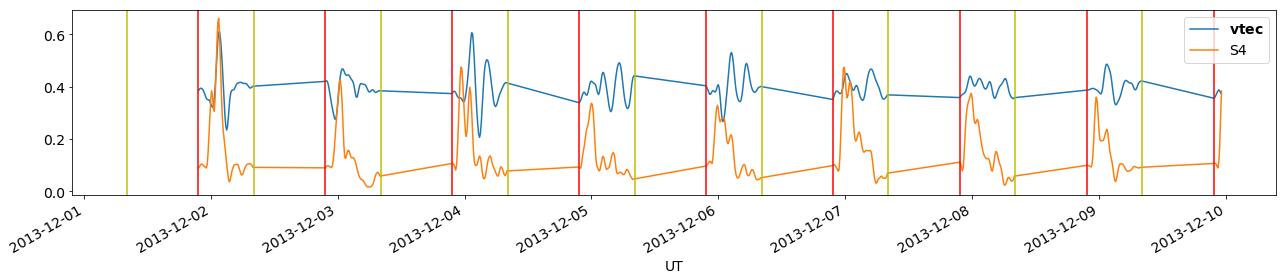

In [16]:
a = 0
b = 512

fig, ax = plt.subplots(1, 1)
figsize=(18, 4)
gvtec_lag_9_scale[a:b].plot(figsize=figsize, ax=ax, label=r'$\bf vtec$')
s4_scale[a:b].plot(figsize=figsize, ax=ax, label='S4')
ax.legend(loc="upper right")
ax.set(xlabel='UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(s4_scale[a:b], lat, long)
set_of_sunset = find_set_sunset(s4_scale[a:b], lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/gvtec1_lag_9_scatter.eps', format='eps', dpi=1000)

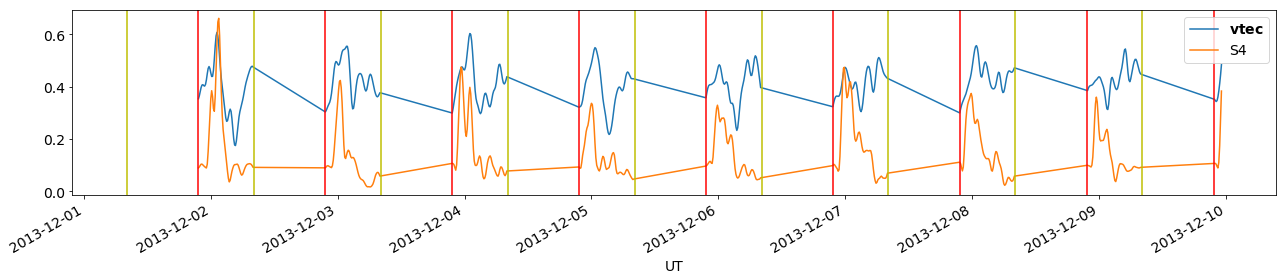

In [17]:
a = 0
b = 512

fig, ax = plt.subplots(1, 1)
figsize=(18, 4)
gvtec_lag_20_scale[a:b].plot(figsize=figsize, ax=ax, label=r'$\bf vtec$')
s4_scale[a:b].plot(figsize=figsize, ax=ax, label='S4')
ax.legend(loc="upper right")
ax.set(xlabel='UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(s4_scale[a:b], lat, long)
set_of_sunset = find_set_sunset(s4_scale[a:b], lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/gvtec2_lag_20_scatter.eps', format='eps', dpi=1000)